# 1. 들어가며
  
__머신러닝을 이용한 텍스트 분류__
***
- 텍스트 분류(Text Classification)란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크
- 자연어 처리 태스크 중 가장 기본
- 비즈니스 영역에서도 가장 수요가 높습니다.
- 예)  '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 
- AI 알고리즘의 일반적인 분류 수행 과정
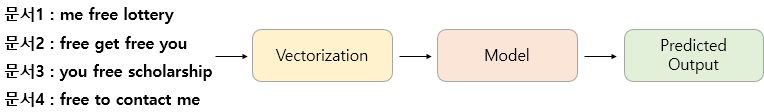
> Vectorization : 워드 임베딩  
Model : RNN, CNN, BERT, 머신러닝
  
- _이번에는 머신러닝, 다중분류를 해보자_

__학습 목표__
***
- 로이터 뉴스 데이터 이해하기
- F1-score, confusion matrix 출력해보기
- 여러 머신러닝 모델 성능 비교하기
- 단어 수에 따른 성능 비교하기
  
__준비물__
***
- 실습 디렉토리 생성  
$ mkdir -p ~/aiffel/reuters_classifiaction

# 2. 로이터 뉴스 데이터 (1) 데이터 확인하기
- 로이터 뉴스 데이터
- 46개 클래스
- 해당 뉴스가 어느 클래스인지 예측하는 문제
- 텐서플로 제공이므로 쉽게 다운로드

__라이브러리 및 데이터 로드__
***

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 데이터 로드 
# num_words : 빈도수 기준 몇번째 단어 까지 사용할지
#test_split : train, test  분리 비율
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


- OOV문제, 이후에 확인

In [2]:
# 데이터 크기 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


__데이터 출력해보기__
***
- 텍스트가 아니라 시퀀스이다.
- 데이터를 로드할때, 단어 빈도수 기준으로 맵핑된 숫자로 변환되어 출력된다.
- 텐서플로우 데이터셋에서는 이미 전처리 한 데이터를 제공하는 것.

In [3]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [4]:
# 레이블확인
print(y_train[0])
print(y_test[0])
# 각 뉴스는 정수 레이블이다.
# 0 부터 시작하므로, 최댓값에 1을 더하면 클래스 수가 된다.
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

3
3
클래스의 수 : 46


In [5]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

__데이터 분포 확인해보기__
***
- 길이 분포 확인
- 클래스 분포 확인 및 시각화

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


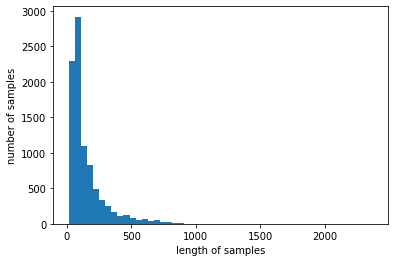

In [6]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 최대 길이 2376, 평균 길이 145
- 길이가 가장 긴 뉴스는 다른 것에 비해 유독 긴 편이다.

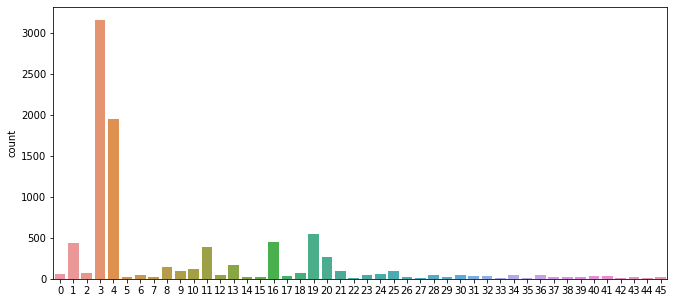

In [7]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

- [subplot, subplots 차이](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294)

In [8]:
#numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)
## ararray_like : Input array. Unless axis is specified, this will be flattened if it is not already 1-D
## return_counts :bool, optional : If True, also return the number of times each unique item appears in ar.New in version 1.9.0.
##Returns: unique :ndarray : The sorted unique values.
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


- 3번, 4번 클래스가 매우 많다.
- 다음으로 19번, 16번이 많다.

# 3. 로이터 뉴스 데이터 (2) 데이터 복원하기
  
__원본 뉴스 데이터로 복원해보기__
***
- 정수 시퀀스롤 변환된 데이터를 다시 텍스트로 돌려보자.
- 로이터 뉴스데이터는 {key:단어, value:정수} 의 dictionary를 제공한다.

In [9]:
# 단어장 불러오기
word_index = reuters.get_word_index(path = "reuters_word_index.json")
# 단어장 확인
print(word_index['the'])
print(word_index['it'])

565248/550378 [==============================] - 0s 0us/step
1
13


- 정수를 단어로 바꿀 index_word가 필요
> 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속  
reuters.get_word_index에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력해 놓았거든요. 그렇기 때문에 word_index에서 index_word를 만들 때, 각 정수에 +3을 해주어야 합니다

In [10]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print(index_to_word[4])
print(index_to_word[16])

the
it


- 0번, 1번, 2번은 사실 각각 \<pad\>, \<sos\>, \<unk\>라는 자연어 처리를 위한 특별한 토큰
- index_to_word에 추가적으로 이 작업

In [11]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [12]:
# 뉴스 기사 복원
print(' '.join(
    [index_to_word[index] for index in x_train[0]]
))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


__OOV 문제 와 UNK 토큰__
***
  
- 모르는 단어, OOV(Out-Of-Vocabulary) 또는 UNK(Unknown)
- 해당 단어를 전부 \<unk\> 토큰으로 변환

- num_words=10000는 정수 번호가 10,000이 넘는 단어들을 자동으로 \<unk\> 토큰으로 처리
- 로이터 뉴스 데이터에서 \<unk\>은 정수 2번을 가지도록 약속
- 로드과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환


__전체 데이터 를 텍스트로 변환__
***

In [13]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [14]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [15]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

In [16]:
len(word_index)

30979

# 4. 벡터화 하기
  
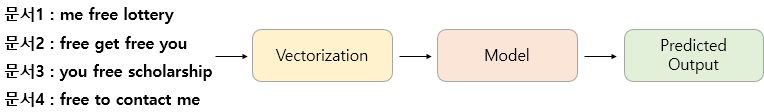
- 벡터화 방법 Word Embedding, Document Embedding, Contextual Embedding, 머신러닝 방법 등
- 이번에는 머신러닝 벡터화 방법 사용
- Bag of Words 가설을 기반으로 하는 __DTM, TF-IDF__ 행렬

- [위키독스: 문서 단어 행렬(DTM)](https://wikidocs.net/24559)

- 사이킷런의 CountVectorizer()로 DTM 생성 및 크기를 확인해보자

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


__DTM 한 train__
- 8982 문장, 9670단어이다.
- DTM이 자체적인 규칙에 따라서 불필요한 토큰을 제거하기 때문에
- 1만개 단어가 아니라, 9670개로 단어가 감소하였다.

> max_dffloat in range [0.0, 1.0] or int, default=1.0
When building the vocabulary __ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)__. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.  

> min_dffloat in range [0.0, 1.0] or int, default=1
When building the vocabulary __ignore terms that have a document frequency strictly lower than the given threshold.__ This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

> __단어 빈도가 구간 \[0,1.0\] = 0< ~ < 1.0 __. 즉 빈도가 0이거나, 1.0 이상인 단어는 제거.  
여기서는 빈도가 1.0 이상인 즉 모두 등장하는 단어가 제거되었다(?)

__TF-IDF__
- [위키독스: TF-IDF](https://wikidocs.net/31698)
- 추가적인 전처리를 하지 않는이상, DTM 과 동일한 크기를 가진다.

In [18]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [19]:
# 제거된 것이 맞는지 확인 해볼까?
(x_train_seq, _), (_, _) = reuters.load_data(num_words=10000, test_split=0.2)

In [20]:
#x_train_seq[0]
#print(len(set(x_train_seq)))
temp = x_train_seq[0]
for i in x_train_seq[1:]:
    temp = set(temp)|set(i)
    #print(i)

print(len(list(temp)))

9982


# 5. 나이브 베이즈 분류기

__나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)__
***
- 나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용
- fit()으로 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습
- 테스트 데이터에 동일한 전처리를 거쳐야 합니다. TF-IDF 행렬로 변환
- predict() 함수를 통해 예측값을 얻어 정확도를 측정

In [21]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [22]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [23]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [24]:
y_test[3]

4

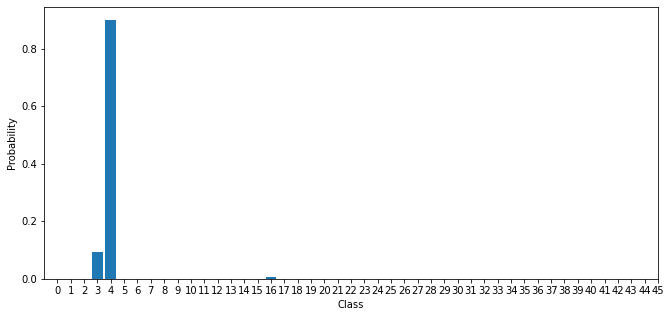

In [25]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [26]:
model.predict(tfidfv_test[3])

array([4])

# 6. F1-Score, Confusion Matrix
  
__Precision, Recall & F1 Score__
***
- [분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)
- 사이킷런의 metrics 패키지에서, 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공
- 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가

> - macro: 단순평균
> - weighted: 각 클래스에 속하는 표본의 개수로 가중평균
> - accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

__Confusion Matrix__
***
- [영상](https://youtu.be/M0GBAzFV9_A)
- [Confusion Matrix](https://mjdeeplearning.tistory.com/31)

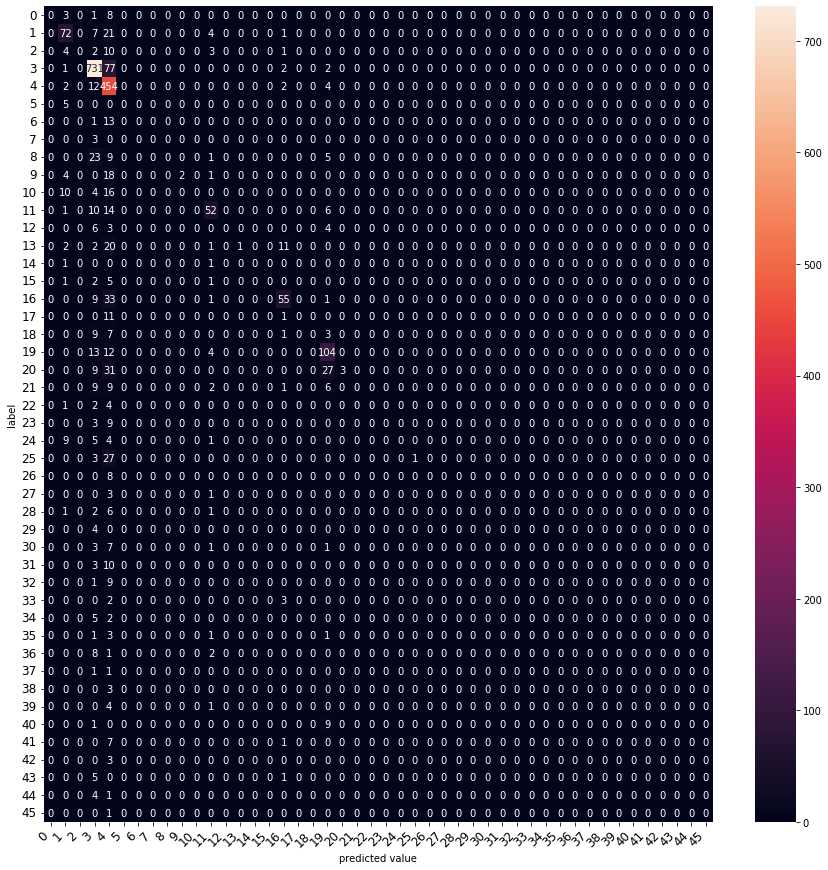

In [28]:
# 혼동행렬 시각화
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')
    
graph_confusion_matrix(model, tfidfv_test, y_test)

# 7. 다양한 머신러밍 모델 사용해보기(1)

__Complement Naive Bayes Classifier(CNB)__
***
- 나이브 베이지안 분류기
- 독립변수가 '조건부 독립적'이라는 가정하기에 문서가 특정분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있다.
- 예) 다수의 샘플이 특정 클래스에 치우친 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있다.
- 이러한 불균형 경우를 보완한 것이,__컴플리먼트 나이브 베이즈 분류기__이다.
- 데이터의 불균형을 고려해 가중치를 부여하는 특징이 있다.
- 따라서, 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋다.

In [29]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


__로지스틱 회귀(Logistic Regression)__
***
- 선형분류알고리즘
- 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원
- 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 한다.
- 이름은 회귀지만, 실제로는 분류를 수행
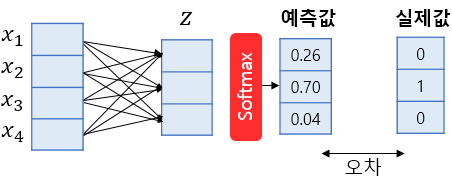
- 소프트맥스 함수
> 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수
> 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습
- 사이킷런에서 소프트맥스 회귀는 LogisticRegression()을 통해서 구현

In [30]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__선형 서포트 벡터 머신(Linear Support Vector Machine)__
***
[SVM](https://youtu.be/y4CYcpRiNsw)
- 서포트 벡터 : 결정경계와 가장 가까운 각 클래스의 데이터.
- 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델
- 일대다(one-vs.-rest 또는 one-vs.-all) 방법으로 다중 클래스 분류 알고리즘으로 사용할 수 있다.
- 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.
- 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

In [31]:
# dualbool, default=True
# Select the algorithm to either solve the dual or primal optimization problem. 
# Prefer dual=False when n_samples > n_features.
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7711487088156723


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 8. 다양한 머신러닝 모델 사용해보기 (2)
  
__결정 트리(Decision Tree)__
***
- [의사결정트리](https://youtu.be/n0p0120Gxqk)
- '예/아니오' 질문을 이어 나가면서 학습
- 사이킷런에서는 DecisionTreeClassifier()를 사용해서 결정 트리를 구현
- 결정 트리의 깊이는 max_depth
- 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징
- DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터
- 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근

In [32]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


__랜덤 포레스트(Random Forest)__
***
- 앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 결정 트리는 훈련에서 과적합되는 경향이 있다.
- 랜덤 포레스트는 이러한 문제를 앙상블로 해결한다.
- 서로 다른 과적합된 트리들을 조합하면 오히려 모델 전체에서 과적합을 피할수 있다는 것.

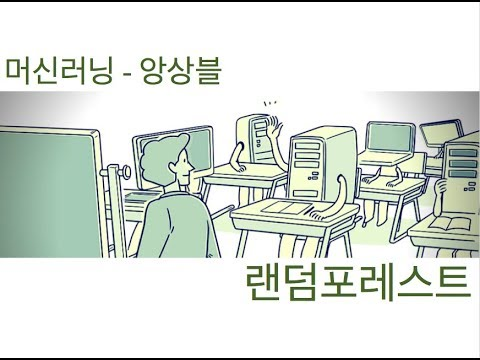

In [33]:
from IPython.display import YouTubeVideo 
YouTubeVideo('nZB37IBCiSA')

In [34]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


__그래디언트 부스팅 트리(GradientBoostingClassifier)__
***
- 여러 개의 결정 트리를 묶어 만드는 앙상블 모델
- 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리는 만든다.
- 일부 특성을 무시하는 특징을 가지고 있다. 따라서, 랜덤 포레스트를 먼저 사용해보고, 성능,예측시간 면에서 만족스럽지 않은 경우 그래디언트 부스팅트리를 시도하는 것이 좋다.
- 일반적으로 1-5 정도의 깊지 않은 트리이므로 __메모리가 적고 예측도 빠르다.__
- 정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델
- 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점
-  TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트 해보자

- verbose=3을 GradientBoostingClassifier안에 인자로 넣어 진행 상황을 확인

In [35]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


__보팅(Voting)__
***
- 투표를 통해 결과를 도출하는 보팅(Voting)
- 하드 보팅은 결과물에 대한 최종값을 투표해서 결정
- 소프트 보팅은 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출
- 세 가지 모델인 __로지스틱 회귀, CNB, 그래디언트 부스팅 트리__를 사용하여 __소프트 보팅__을 하였을 때의 성능을 비교

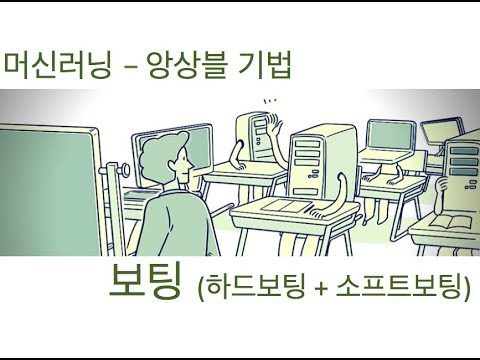

In [36]:
from IPython.display import YouTubeVideo 
YouTubeVideo('y4Wh0E1d4oE')

In [37]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8116651825467498


# 프로젝트 : Vocabulary Size를 변경해서 시도하기.
  
  
- 지금까지 모델을 조합하여 성능을 향상하고자 하였다.
- Bag of Words 기반의 DTM, TF-IDF의 경우 __단어의 수__에 따라 성능에 영향을 받을 수 있다.

- 다음 것들을 시도 해보자.
### 1. 단어수 조절_모든단어, 빈도수 상위 5000개, 그 외
### 2. 여러 모델로 시도하기
### 3. 딥러닝 모델과 비교해보기
> 

In [1]:
# 버젼 확인
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.22.2
1.3.3
1.0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tensorflow.keras.datasets import reuters
# 단어 사용 함수화
def data_with_nwords(num_words = None):
    # 단어수로 데이터 불러오기
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    # 단어인덱스 불러오기
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    
    # index to word 만들기 012 토큰 자리 밀어주기
    index_to_word = {index + 3 : word for word, index in word_index.items()}
    
    # index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
        index_to_word[index]=token
        
    # 데이터 변환
    decoded = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        decoded.append(t)

    x_train = decoded
    decoded = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        decoded.append(t)

    x_test = decoded
    
    # 벡터화
    # DTM 생성
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    print('X_train DTM shape : ',x_train_dtm.shape)
    # TF-IDF 생성
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    print('TF-IDF shape',tfidfv.shape)
    
    #테스트 데이터를 DTM으로 변환
    x_test_dtm = dtmvector.transform(x_test) 
    #DTM을 TF-IDF 행렬로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm)
    
    return tfidfv, y_train, tfidfv_test, y_test


In [10]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def train_ml(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기 
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    
    mod_predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
    mod_acc = accuracy_score(y_test, mod_predicted)
    print("나이브 베이즈 정확도:", mod_acc) #예측값과 실제값 비교
    
    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    cb_acc = accuracy_score(y_test, cb_predicted)
    print("CNB 정확도:",cb_acc) #예측값과 실제값 비교
    
    # 로지스틱 회귀 
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    lr_acc = accuracy_score(y_test, lr_predicted)
    print("로지스틱 회귀 정확도:", lr_acc) #예측값과 실제값 비교
    
    # 선형 서포트 벡터 머신 
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    lsvc_acc = accuracy_score(y_test, lsvc_predicted)
    print("SVM 정확도:",lsvc_acc) #예측값과 실제값 비교
    
    # 결정 트리(Decision Tree) 
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    tree_acc =  accuracy_score(y_test, tree_predicted)
    print("결정 트리 정확도:", tree_acc) #예측값과 실제값 비교
    
    # 랜덤 포레스트(Random Forest)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    forest_acc = accuracy_score(y_test, forest_predicted)
    print("랜덤 포레스트 정확도:", forest_acc) #예측값과 실제값 비교
    
    # 그래디언트 부스팅 트리(GradientBoostingClassifier)
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidfv, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    grbt_acc =   accuracy_score(y_test, grbt_predicted)
    print("그래디언트 부스팅 트리 정확도:", grbt_acc) #예측값과 실제값 비교
    
    # 보팅(Voting)
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    voting_acc = accuracy_score(y_test, voting_classifier_predicted)
    print("보팅 정확도:", voting_acc) #예측값과 실제값 비교
    
    return mod_acc, cb_acc, lr_acc, lsvc_acc, tree_acc, forest_acc, grbt_acc, voting_acc

In [11]:
word_num_list= [500, 1000, 5000, 10000, 20000, None]
mod_acc_list =[]
cb_acc_list = []
lr_acc_list = []
lsvc_acc_list = []
tree_acc_list = []
forest_acc_list = []
grbt_acc_list = []
voting_acc_list = []
for num in word_num_list:
    print(num,'개 단어 사용')
    
    # 단어 100개 사용
    tfidfv, y_train, tfidfv_test, y_test = data_with_nwords(num_words = num)
    mod_acc, cb_acc, lr_acc, lsvc_acc, tree_acc, forest_acc, grbt_acc, voting_acc = train_ml(tfidfv, y_train, tfidfv_test, y_test)
    
    mod_acc_list.append(mod_acc)
    cb_acc_list.append(cb_acc)
    lr_acc_list.append(lr_acc)
    lsvc_acc_list.append(lsvc_acc)
    tree_acc_list.append(tree_acc)
    forest_acc_list.append(forest_acc)
    grbt_acc_list.append(grbt_acc)
    voting_acc_list.append(voting_acc)
    print('-'*15)
    

500 개 단어 사용
565248/550378 [==============================] - 0s 0us/step
X_train DTM shape :  (8982, 482)
TF-IDF shape (8982, 482)
나이브 베이즈 정확도: 0.6589492430988424
CNB 정확도: 0.707479964381122


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.773820124666073


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.713713268032057
결정 트리 정확도: 0.6108637577916296
랜덤 포레스트 정확도: 0.6981300089047195
      Iter       Train Loss   Remaining Time 
         1           1.7058           11.91m
         2           1.7403           11.78m
         3 327791665051955733955342421861979112893054976.0000           11.61m
         4 252473705212545897862674137780010934842949632.0000           11.47m
         5 252473705212545897862674137780010934842949632.0000           11.35m
         6 252473705212545897862674137780010934842949632.0000           11.22m
         7 252473705212545897862674137780010934842949632.0000           11.09m
         8 252473705212545897862674137780010934842949632.0000           10.97m
         9 252473705212545897862674137780010934842949632.0000           10.86m
        10 252473705212545897862674137780010934842949632.0000           10.73m
        11 252473705212545897862674137780010934842949632.0000           10.60m
        12 252473705212545897862674137780010934842949632.0000   

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.7724844167408726
---------------
1000 개 단어 사용
X_train DTM shape :  (8982, 969)
TF-IDF shape (8982, 969)
나이브 베이즈 정확도: 0.6856634016028496
CNB 정확도: 0.7346393588601959


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.780053428317008


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.723953695458593
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.707479964381122
      Iter       Train Loss   Remaining Time 
         1           1.5717           13.61m
         2        3967.8426           13.62m
         3        4754.6181           13.51m
         4     1016060.1416           13.41m
         5     1016079.3289           13.27m
         6     6974797.9520           13.13m
         7     6974845.8927           13.00m
         8     6974845.8761           12.87m
         9 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           12.74m
        10 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           12.61m
        11 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           12.49m
        12 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           12.36m
        13 677116110006994

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.784060552092609
---------------
5000 개 단어 사용
X_train DTM shape :  (8982, 4867)
TF-IDF shape (8982, 4867)
나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8058771148708815


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7715939447907391
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           16.94m
         2     2131099.0239           16.91m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           16.79m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           16.66m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.50m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.34m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.19m
         8 443067299530301659980

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8161175422974176
---------------
10000 개 단어 사용
X_train DTM shape :  (8982, 9670)
TF-IDF shape (8982, 9670)
나이브 베이즈 정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.776046304541407
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113
      Iter       Train Loss   Remaining Time 
         1           1.4608           17.80m
         2       95544.1548           17.81m
         3      105411.1055           17.71m
         4 26490374809120059619893320924222374741943986946048.0000           17.56m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           17.38m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           17.20m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           17.05m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           16.87m
   

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8116651825467498
---------------
20000 개 단어 사용
X_train DTM shape :  (8982, 18479)
TF-IDF shape (8982, 18479)
나이브 베이즈 정확도: 0.6193232413178985
CNB 정확도: 0.7671415850400712


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8098842386464826


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.782279608192342
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6714158504007124
      Iter       Train Loss   Remaining Time 
         1           1.4325           18.63m
         2       95425.3579           18.61m
         3      105570.6041           18.49m
         4 593224062708261760.0000           18.29m
         5 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           18.13m
         6 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           17.96m
         7 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000           17.82m
         8 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000          

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8178984861976848
---------------
None 개 단어 사용
X_train DTM shape :  (8982, 26506)
TF-IDF shape (8982, 26506)
나이브 베이즈 정확도: 0.5997328584149599
CNB 정확도: 0.7649154051647373


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.813446126447017


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7791629563668745
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6544968833481746
      Iter       Train Loss   Remaining Time 
         1           1.4301           19.24m
         2       76760.8864           19.23m
         3   766490025.2967           19.26m
         4 660857139232122368.0000           19.21m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           19.14m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           19.00m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.82m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.61m
         9 1006529060

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8187889581478184
---------------


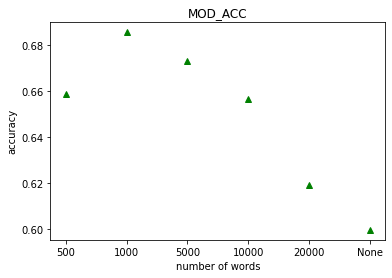

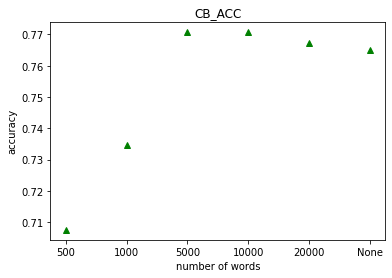

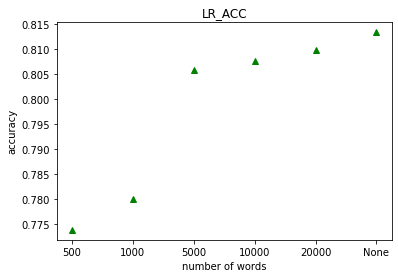

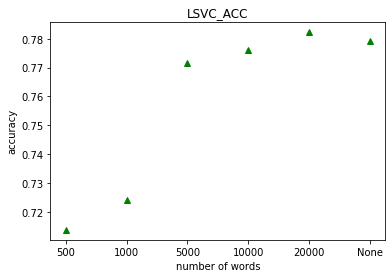

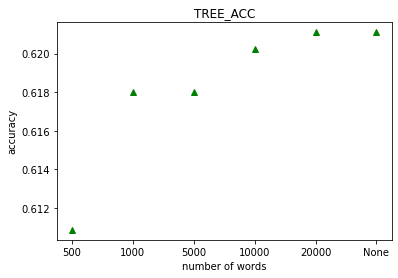

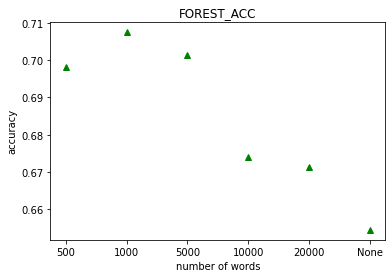

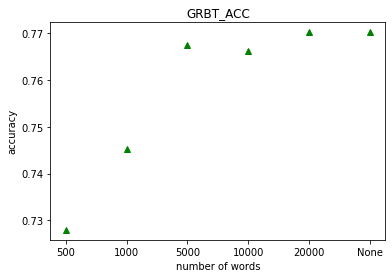

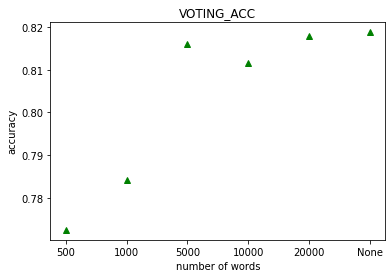

In [16]:
# 그리기
import matplotlib.pyplot as plt
# word_num_list
# mod_acc_list
# cb_acc_list
# lr_acc_list
# lsvc_acc_list
# tree_acc_list
# forest_acc_list
# grbt_acc_list
# voting_acc_list
word_num_list_str= ['500', '1000', '5000', '10000', '20000', 'None']
title_list = {'mod_acc': mod_acc_list,
              'cb_acc': cb_acc_list,
              'lr_acc': lr_acc_list,
              'lsvc_acc': lsvc_acc_list,
              'tree_acc': tree_acc_list,
              'forest_acc': forest_acc_list,
              'grbt_acc': grbt_acc_list,
              'voting_acc': voting_acc_list}
for title in title_list.keys():

    plt.plot(word_num_list_str, title_list[title],'g^')
    plt.xlabel('number of words')
    plt.ylabel('accuracy')
    plt.title(title.upper())
    plt.show()

# 결과
- 단어의 크기를 500에서 전체로 변화하면 정확도를 보았으나 같은 모델내에서 0.1 이상의 변동은 없었다.
- MOD 와 FREST 의 경우 단어 1천 이후 단어수가 증가함에 따라 오히려 성능이 소폭 감소하였다.
- 그외 나머지 방법은 단어 5천이후 소폭 증가하여 크게 변동없었다.
# 회고
- 단어수 '500', '1000', '5000', '10000', '20000', 'None'에서 각각 모델의 성능을 확인하였다.
- RNN 모델시도는 못하였다.
# 참고
- https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-04%5DTFIDF_vectorization.ipynb